# Box Office

Kaggle TMDB Box Office Prediction Competition 2019

Authors: Sean Trinh, Hariharan Vijayachandran

Part 1 - Process the data.

In [82]:
'''
    Process the data.
'''
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [84]:
to_drop = ['id','belongs_to_collection','homepage','imdb_id','original_title','title','original_language','overview','poster_path','status','tagline','Keywords' ]
for x in to_drop:
    train_df = train_df.drop(x,axis=1)
    if x!= 'revenue':
        test_df = test_df.drop(x,axis=1)

In [85]:

train_df['spoken_languages'] = train_df['spoken_languages'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['spoken_languages'] = test_df['spoken_languages'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['production_companies'] =train_df['production_companies'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['production_companies'] = test_df['production_companies'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['production_countries'] =train_df['production_countries'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df ['production_countries']= test_df['production_countries'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['cast'] =train_df['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['cast'] = test_df['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['crew'] =train_df['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df['crew'] = test_df['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['genres'] =train_df['genres'].apply(lambda x: x.count('{') if type(x)==str else 0)
test_df ['genres']= test_df['genres'].apply(lambda x: x.count('{') if type(x)==str else 0)
train_df['release_month'] = train_df['release_date'].apply(lambda x:int(x.split('/')[0]) if type(x)==str else 0 )
train_df['release_year'] = train_df['release_date'].apply(lambda x:int(x.split('/')[2])if type(x)==str else 0 )
train_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )
test_df['release_month'] = train_df['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
test_df['release_year'] = train_df['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0)
test_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )


In [86]:
train_df.head()
test_df.head()

,budget,genres,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,cast,crew,release_month,release_year
0,0,4,3.851534,0,2,0.0,90.0,2,7,2,0.0,0.0
1,88000,2,3.559789,1,1,0.0,65.0,1,10,8,0.0,0.0
2,0,2,8.085194,3,1,0.0,100.0,1,9,10,0.0,0.0
3,6800000,3,8.596012,3,2,0.0,130.0,3,23,69,0.0,0.0
4,2000000,2,3.217680,0,1,0.0,92.0,1,4,14,0.0,0.0


In [87]:
train=train_df.sample(frac=0.7,random_state=200)
test=train_df.drop(train.index)

In [88]:
print(len(train))

print(len(test))

train_df.info()

2100
900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
budget                  3000 non-null int64
genres                  3000 non-null int64
popularity              3000 non-null float64
production_companies    3000 non-null int64
production_countries    3000 non-null int64
release_date            3000 non-null int64
runtime                 2998 non-null float64
spoken_languages        3000 non-null int64
cast                    3000 non-null int64
crew                    3000 non-null int64
revenue                 3000 non-null int64
release_month           3000 non-null int64
release_year            3000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 304.8 KB


In [89]:
import numpy as np
train = train.apply(np.log)
def f(x):
    if x<0:
        return 0
    return x
train = train.applymap(f)
train = train.fillna(0)
X = train.drop('revenue',axis = 1)
Y = train['revenue']

test = test.apply(np.log)
test = test.applymap(f)
test = test.fillna(0)
X_test =test.drop('revenue',axis = 1)
Y_test = test['revenue']

train.head()

,budget,genres,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,cast,crew,revenue,release_month,release_year
2585,0.000000,0.693147,1.657191,1.098612,0.000000,2.833213,4.418841,0.000000,2.890372,2.772589,14.156419,1.791759,2.397895
2611,0.000000,0.693147,2.818963,0.000000,0.000000,3.044522,4.672829,0.000000,3.367296,3.610918,18.251453,1.386294,4.488636
219,14.771022,0.000000,0.790251,0.000000,0.693147,2.197225,4.653960,0.000000,2.639057,2.079442,14.967980,1.945910,1.386294
2204,17.504390,1.386294,2.382268,0.000000,0.000000,3.135494,4.691348,0.000000,3.178054,1.945910,17.153756,2.302585,2.197225
251,18.400478,0.693147,1.985746,1.386294,1.386294,3.091042,4.779123,0.693147,3.433987,2.772589,16.119826,2.484907,4.553877


In [90]:
from keras import models, layers, regularizers, optimizers
model=models.Sequential()
model.add(layers.Dense(356, activation='relu', input_shape=(X.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse'
,metrics=['mean_squared_logarithmic_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 356)               4628      
_________________________________________________________________
dropout_2 (Dropout)          (None, 356)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               91392     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 98,601
Trainable params: 98,601
Non-trainable params: 0
_________________________________________________________________


In [91]:
history=model.fit(X,Y,epochs=40,batch_size = 32, validation_data=(X_test, Y_test))

Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 0s 194us/step - loss: 167.5467 - mean_squared_logarithmic_error: 2.2386 - val_loss: 138.8838 - val_mean_squared_logarithmic_error: 1.5626
Epoch 2/40
2100/2100 [==============================] - 0s 66us/step - loss: 123.4601 - mean_squared_logarithmic_error: 1.3140 - val_loss: 100.7907 - val_mean_squared_logarithmic_error: 0.9663
Epoch 3/40
2100/2100 [==============================] - 0s 65us/step - loss: 88.6403 - mean_squared_logarithmic_error: 0.8263 - val_loss: 70.1151 - val_mean_squared_logarithmic_error: 0.6197
Epoch 4/40
2100/2100 [==============================] - 0s 63us/step - loss: 61.1569 - mean_squared_logarithmic_error: 0.5385 - val_loss: 46.8283 - val_mean_squared_logarithmic_error: 0.4086
Epoch 5/40
2100/2100 [==============================] - 0s 63us/step - loss: 41.2074 - mean_squared_logarithmic_error: 0.3623 - val_loss: 31.3871 - val_mean_squared_logarithmic_error: 

EVALUATE AND GRAPH

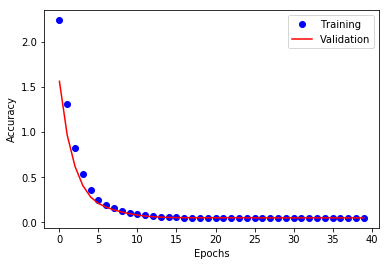

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['mean_squared_logarithmic_error']
val_acc = history.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:


test_df = test_df.apply(np.log)
test_df = test_df.applymap(f)
test_df = test_df.fillna(0)
result = model.predict(test_df)
result = np.exp(result)

output_df = pd.read_csv('./data/test.csv')
to_drop_for_output = to_drop+['budget','runtime','popularity','spoken_languages','production_companies','production_countries','cast','crew','genres','release_date']
for x in to_drop_for_output:
    if x!= 'revenue'and x!='id':
        output_df.drop(x,axis=1,inplace = True)



output_df['revenue'] = result
output_df.head()
# output_df.to_csv("./submission.csv",index = False)

,id,revenue
0,3001,1.353238e+04
1,3002,9.710500e+04
2,3003,6.628835e+04
3,3004,8.737822e+06
4,3005,9.244346e+05


In [ ]:
output_df.to_csv("./submission.csv",index = False)